# 8.5 Convolution Neural Nets (CNN)

In [2]:
import torch

In [1]:
from torch import nn, optim

In [19]:
from setup_libs import *

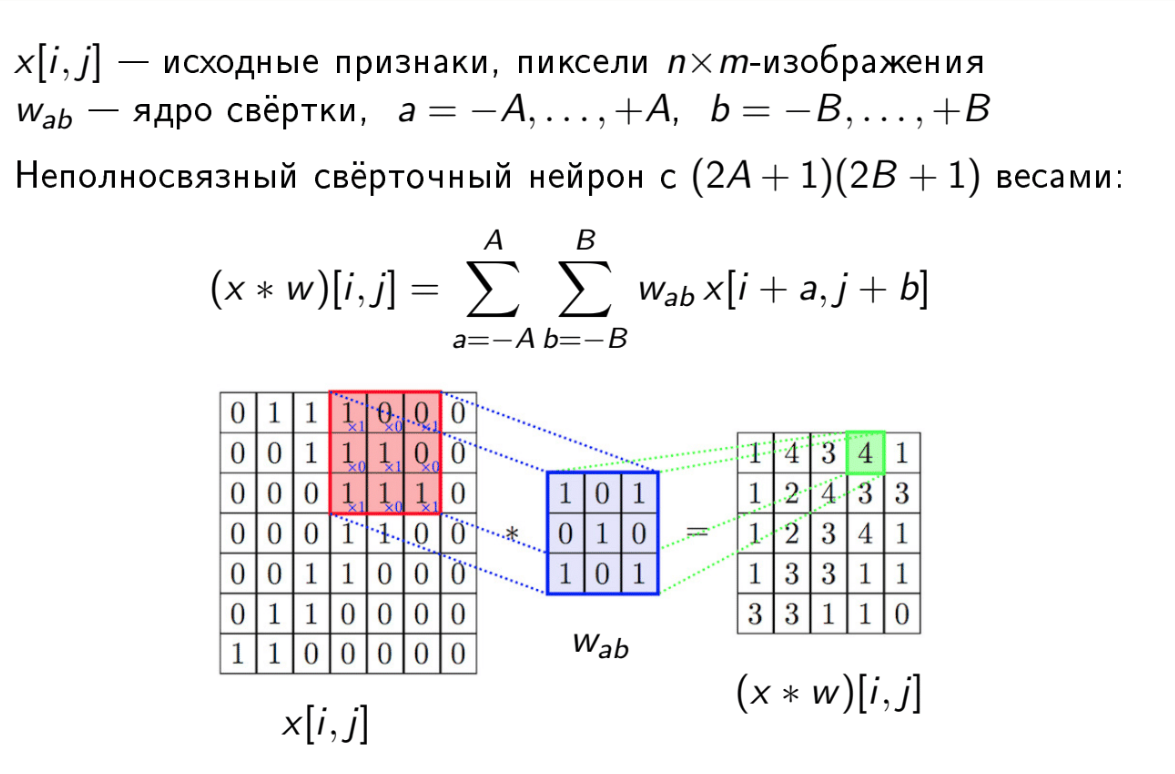

In [14]:
Image('images/conv.png', width=600)

In [36]:
l = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=(2,2))

l(torch.arange(36, dtype=torch.float).reshape((1,3,3,4)))

tensor([[[[ -0.0249,  -0.4856,  -0.9463],
          [ -1.8677,  -2.3284,  -2.7891]],

         [[ -8.0538,  -7.9722,  -7.8905],
          [ -7.7272,  -7.6456,  -7.5640]],

         [[ -4.3262,  -4.4262,  -4.5262],
          [ -4.7262,  -4.8262,  -4.9262]],

         [[-13.9463, -14.9318, -15.9173],
          [-17.8883, -18.8739, -19.8594]],

         [[  2.6559,   2.6837,   2.7116],
          [  2.7672,   2.7951,   2.8229]]]], grad_fn=<ThnnConv2DBackward>)

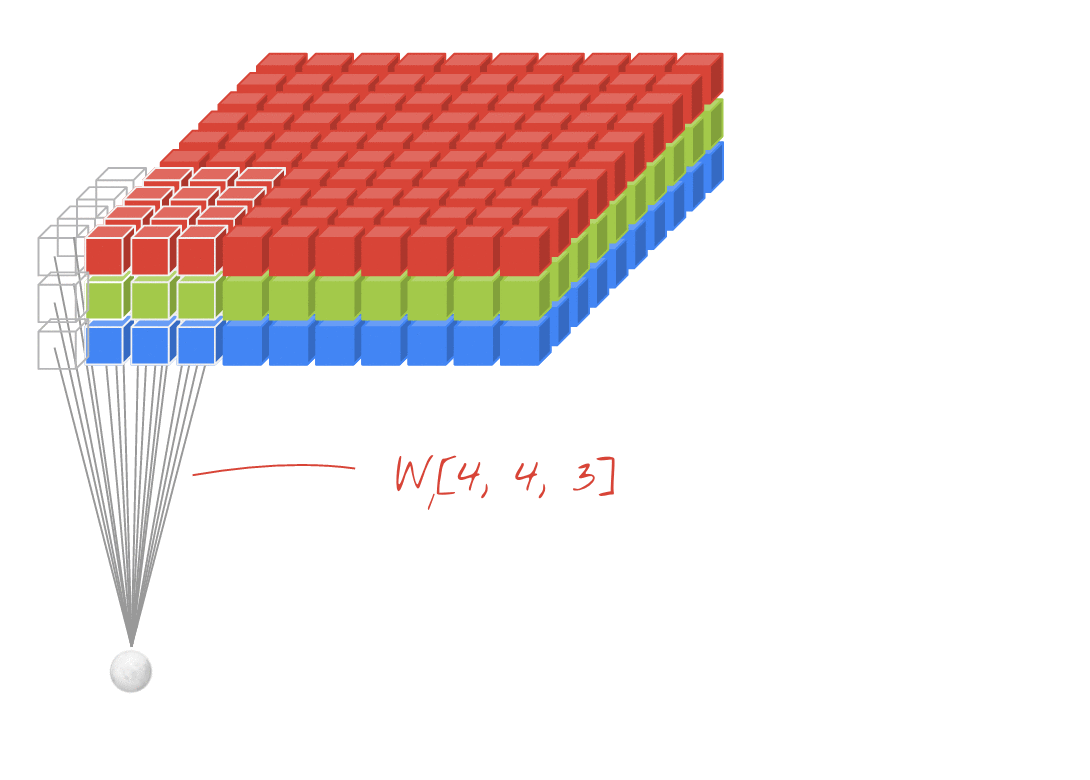

In [21]:
Image('images/conv.gif')

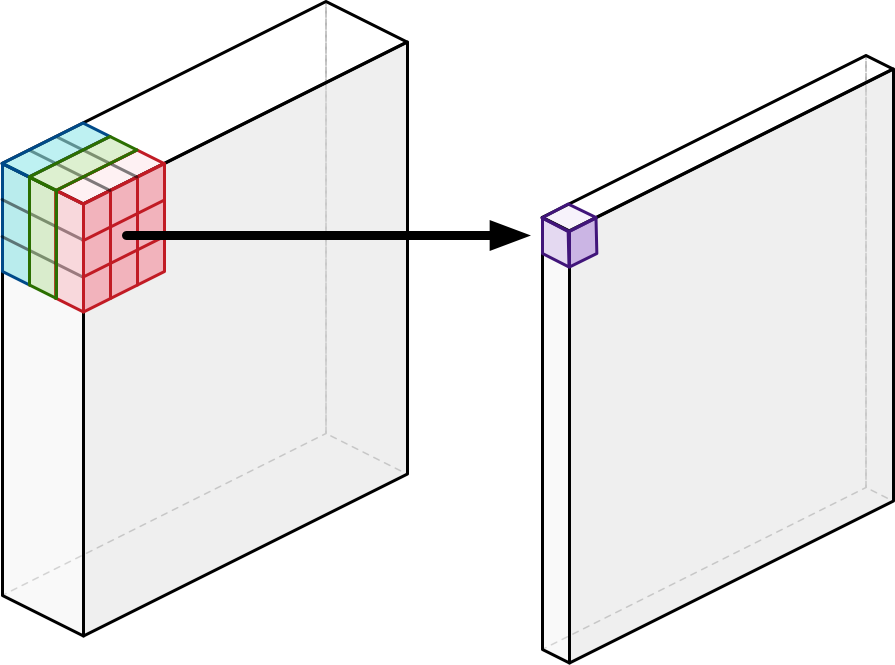

In [25]:
Image('images/conv2.png', width=400)

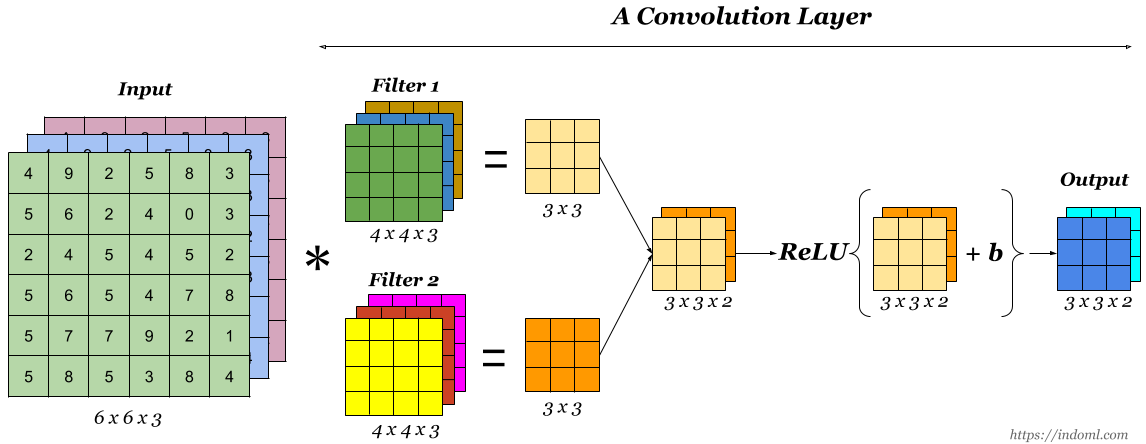

In [26]:
Image('images/conv3.png', width=400)

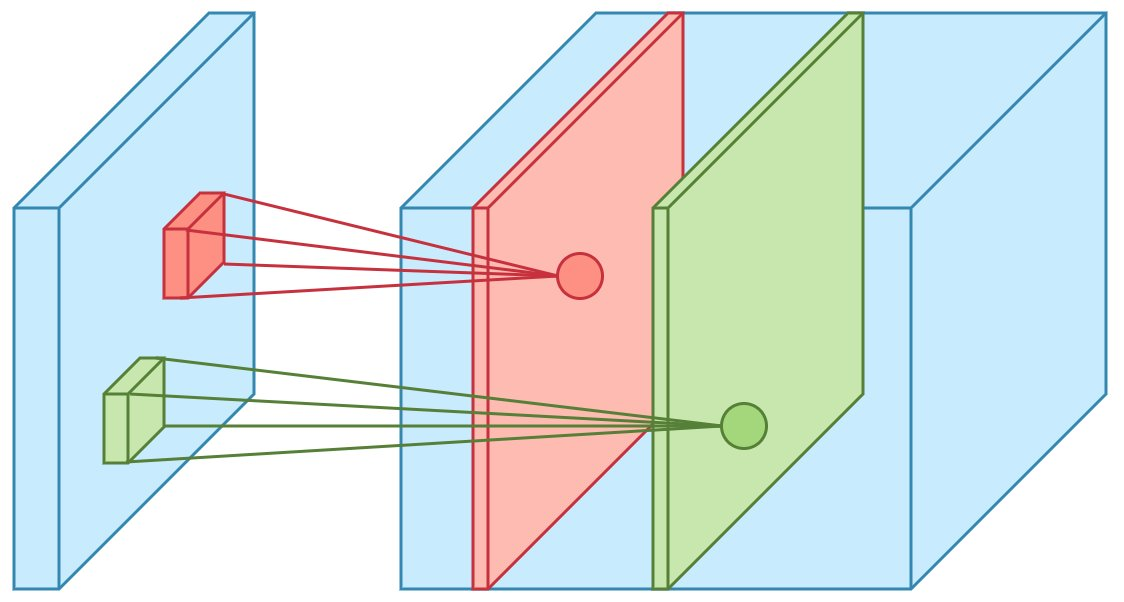

In [27]:
Image('images/conv1.jpg', width=400)

## Padding

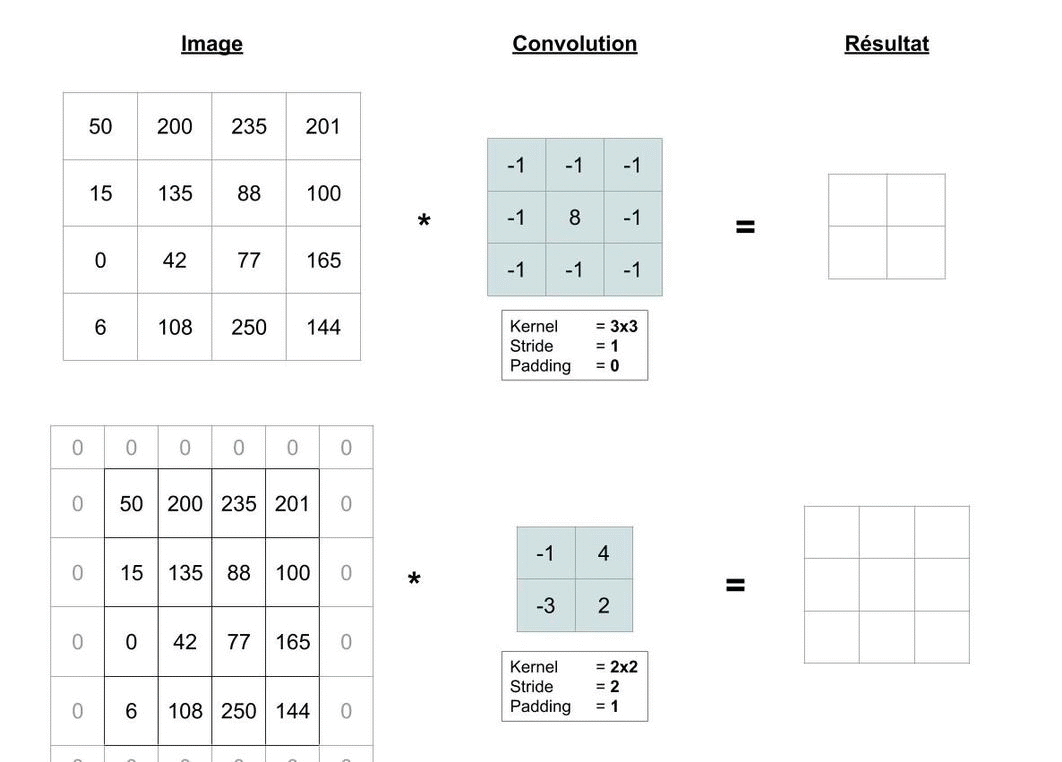

In [28]:
Image('images/padding.gif', width=400)

In [ ]:
#

In [40]:
nn.Conv2d(in_channels=3, out_channels=5, 
                  kernel_size=(3,3), 
                  padding=2, 
                  stride=2),

l = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=(2,2))

l(torch.arange(36, dtype=torch.float).reshape((1,3,3,4)))

tensor([[[[  7.1340,   8.3817,   9.6295],
          [ 12.1250,  13.3728,  14.6206]],

         [[  2.4183,   2.6340,   2.8497],
          [  3.2812,   3.4969,   3.7126]],

         [[ -7.2079,  -7.7502,  -8.2926],
          [ -9.3773,  -9.9197, -10.4621]],

         [[ 20.1800,  21.0620,  21.9440],
          [ 23.7079,  24.5899,  25.4718]],

         [[  6.0628,   6.4674,   6.8720],
          [  7.6811,   8.0857,   8.4902]]]], grad_fn=<ThnnConv2DBackward>)

## All in difference

[Ссыль](https://github.com/vdumoulin/conv_arithmetic)

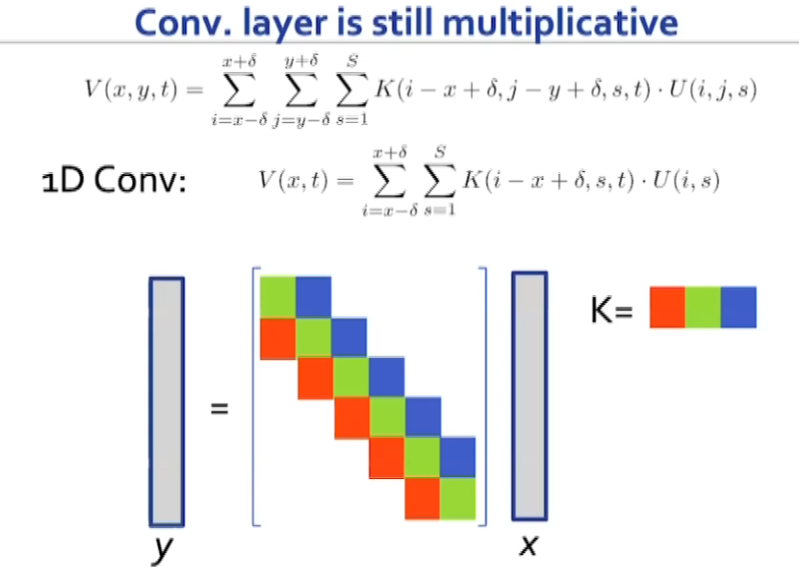

In [14]:
Image('images/ConvtoLinear.png', width=600)

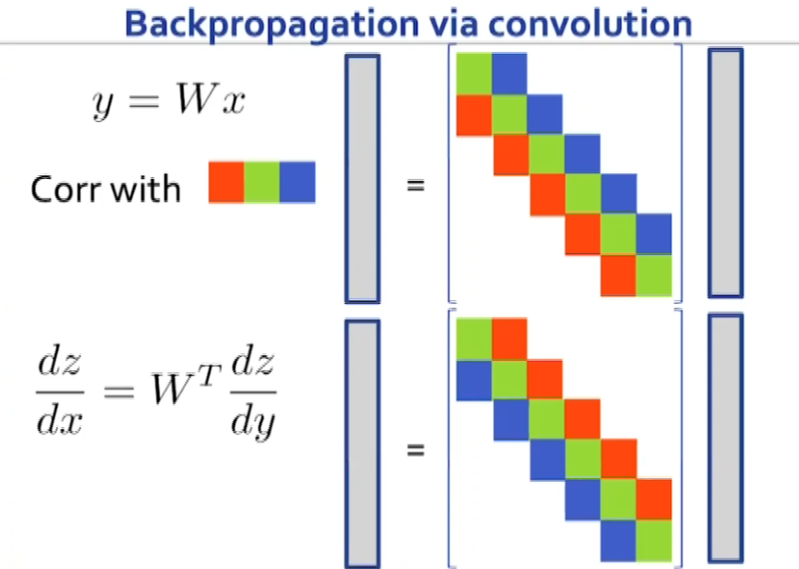

In [15]:
Image('images/ConvBackProp.png', width=600)

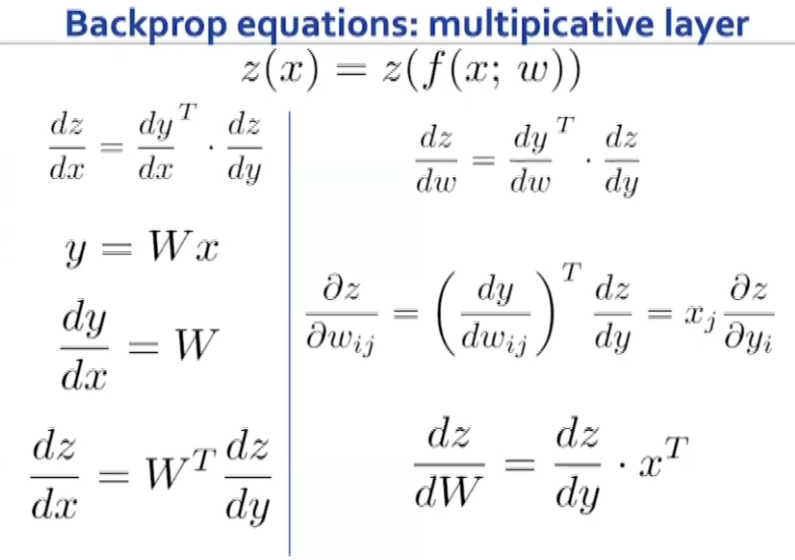

In [16]:
Image('images/backpropparams.png', width=600)

# 8.6 Pooling

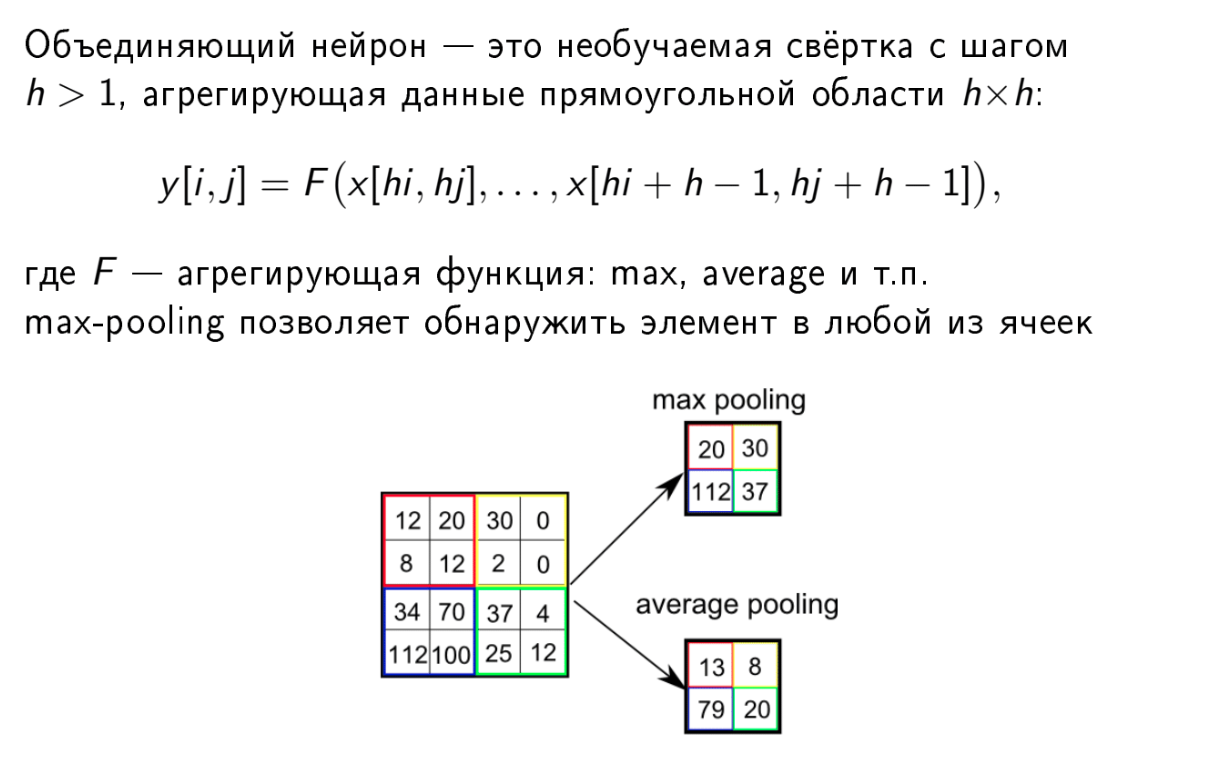

In [15]:
Image('images/pooling.png', width=600)

In [41]:
x = torch.tensor([[[12,20,30, 0],
                  [ 8,12, 2, 0],
                  [34,70,37, 4],
                [112,100,25,12]]], dtype=float)
print(x.size())
print(nn.MaxPool2d(kernel_size=(2,2))(x))
print(nn.AvgPool2d(kernel_size=(2,2))(x))

torch.Size([1, 4, 4])
tensor([[[ 20.,  30.],
         [112.,  37.]]], dtype=torch.float64)
tensor([[[13.0000,  8.0000],
         [79.0000, 19.5000]]], dtype=torch.float64)


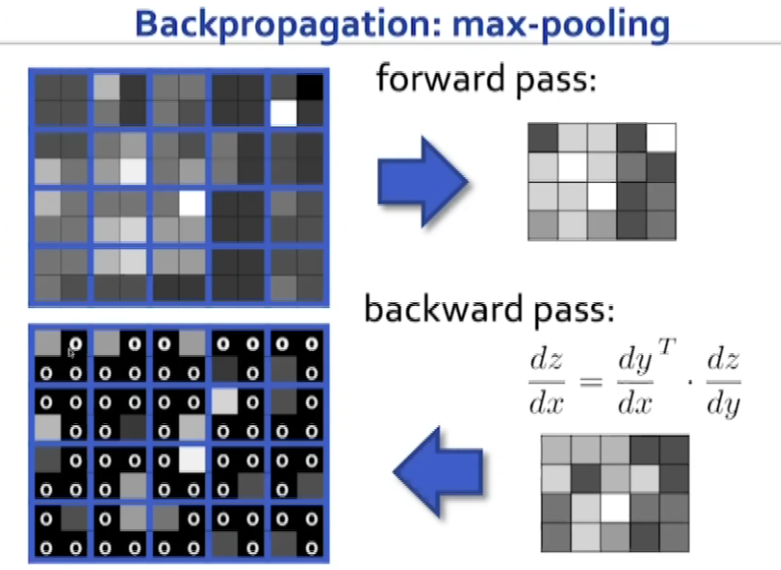

In [17]:
Image('images/poolback.png', width=600)

# 8.7 CNN

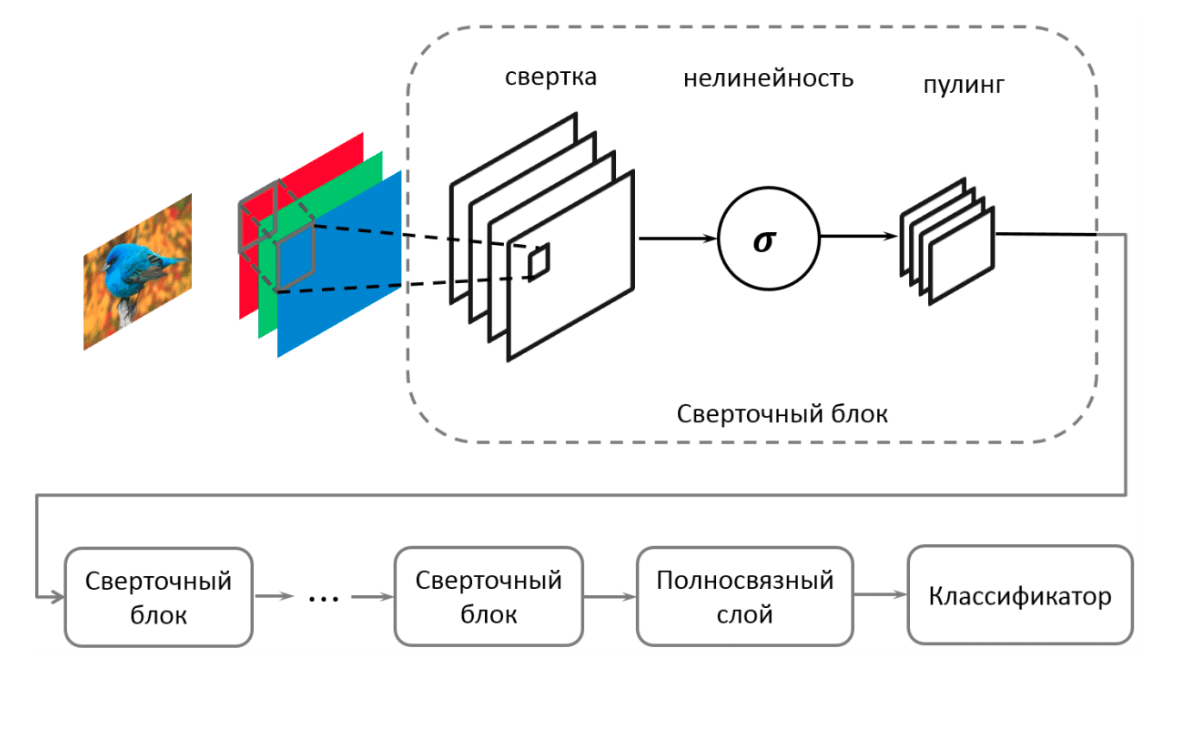

In [18]:
Image('images/convblock.png', width=600)

In [42]:
def block(cin=1, cout=3, kernel_size=(3,3), padding=(1,1), stride=(1,1), pool_size=(2,2)):
    return nn.Sequential(
        nn.Conv2d(in_channels=cin, 
                  out_channels=cout, 
                  kernel_size=kernel_size, 
                  padding=padding, 
                  stride=stride), #cin x H(4) x W(4)
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=pool_size)
    )

x = torch.tensor([[[12,20,30, 0],
                  [ 8,12, 2, 0],
                  [34,70,37, 4],
                [112,100,25,12]]], dtype=float)


RuntimeError: Boolean value of Tensor with more than one value is ambiguous

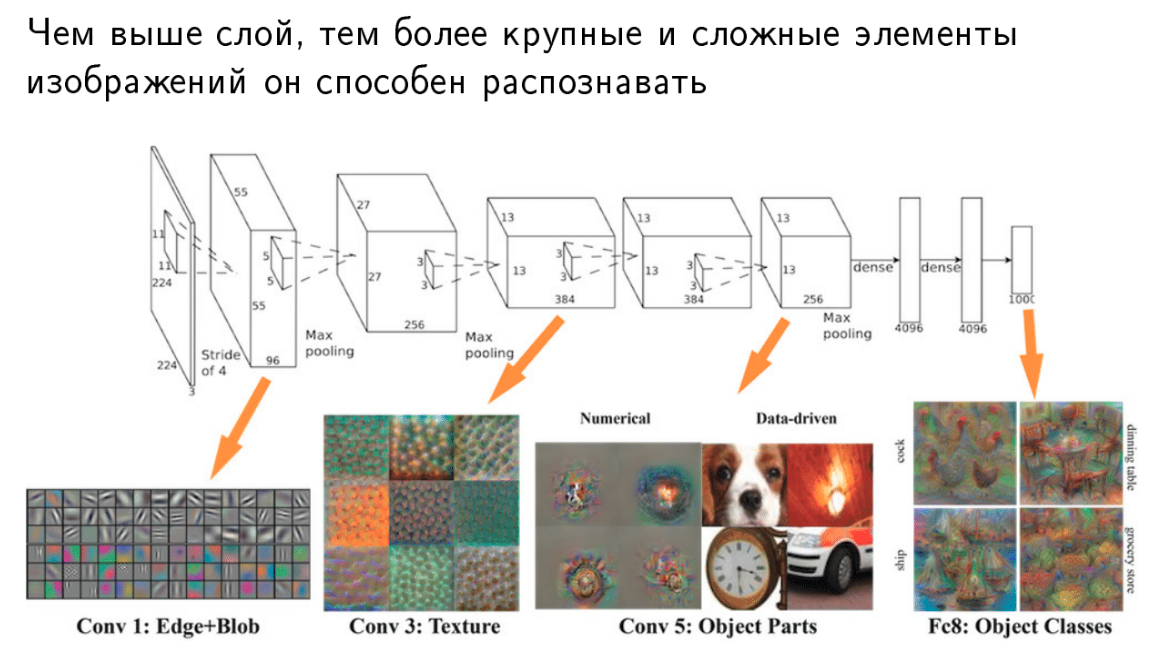

In [17]:
Image('images/convdesc.png', width=600)

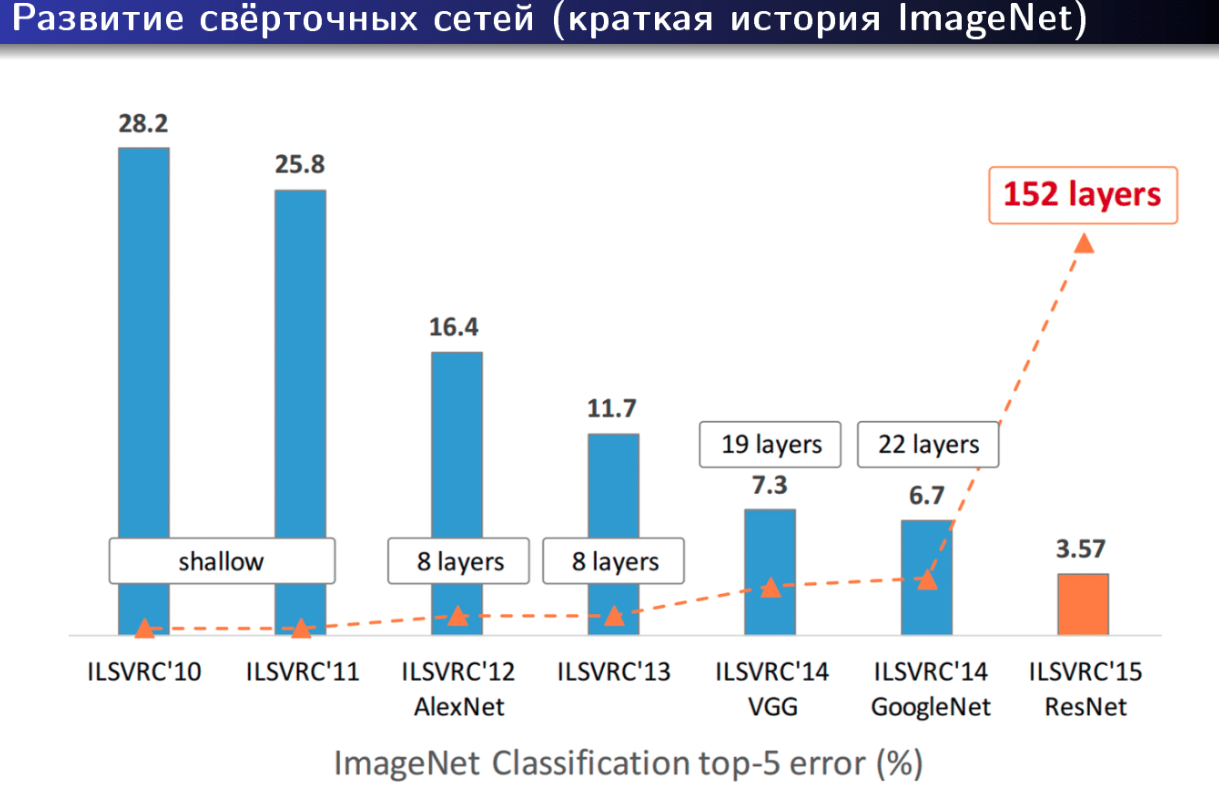

In [3]:
Image('images/result_imagenet.png', width=600)

# 8.8 LeNet

In [ ]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)
    
model nn.Sequential(            
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
    nn.Tanh(),
    nn.AvgPool2d(kernel_size=2),
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
    nn.Tanh(),
    nn.AvgPool2d(kernel_size=2),
    nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
    nn.Tanh(), # закончилась часть со свертками
    nn.Flatten()
    nn.Linear(in_features=120, out_features=84),
    nn.Tanh(),
    nn.Linear(in_features=84, out_features=n_classes),
    nn.Softmax()
)

# 8.8 Dropout

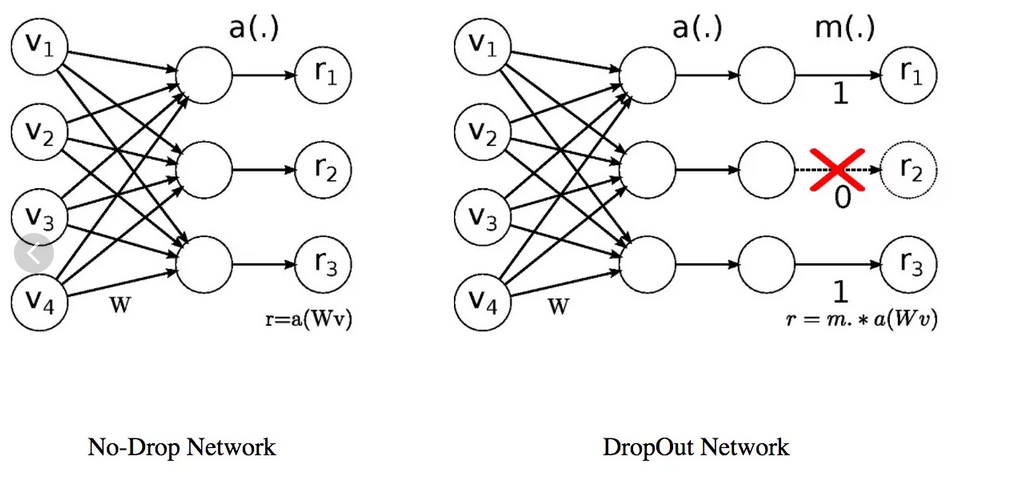

In [13]:
Image('images/dropout.png', width=600)

In [ ]:
nn.Dropout()

# 8.9 BatchNormalization

$$BatchNorm(x) = \frac{x - \mu}  {\sqrt{\sigma + \epsilon}}$$

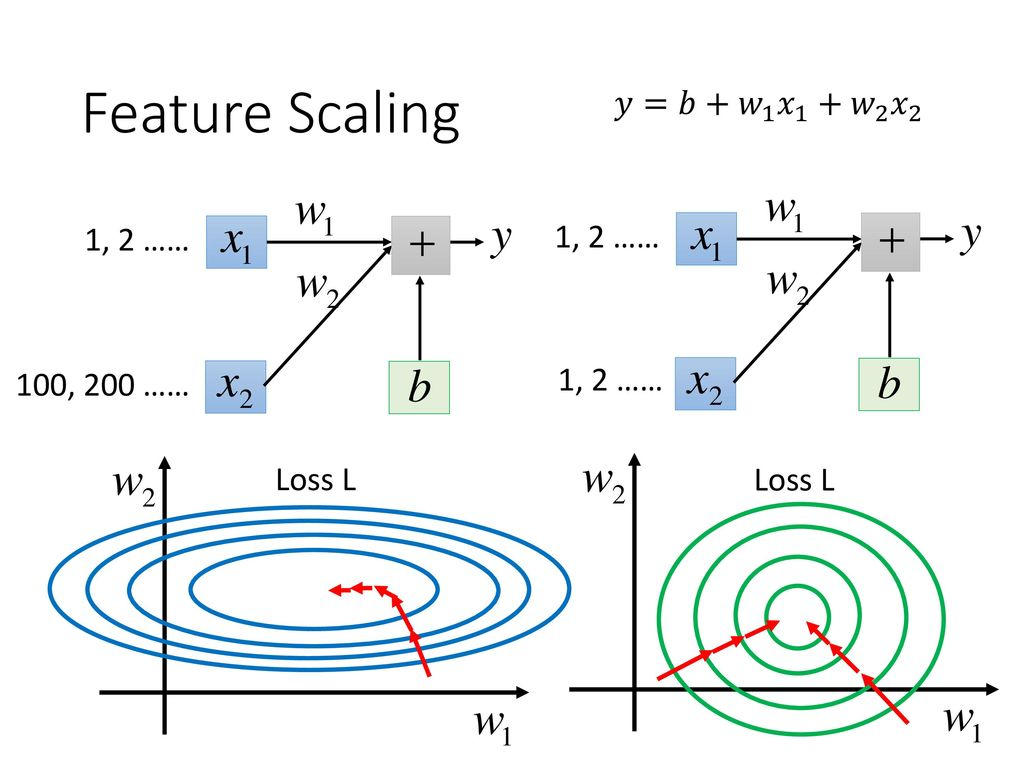

In [11]:
Image('images/norm.jpg', width=600)

# 8.9 Transforms

# Ссылки
* [Лекция Воронцова откуда взяты слайды](https://www.youtube.com/watch?v=oMatzWuAo2g&list=PLJOzdkh8T5krxc4HsHbB8g8f0hu7973fK&index=14)
* [Dropout Habr](https://habr.com/ru/company/wunderfund/blog/330814/)
* [BatchNorm Habr](https://habr.com/ru/post/309302/)

* [Визуализация сверточных слоев](https://www.machinelearningmastery.ru/visualizing-convolution-neural-networks-using-pytorch-3dfa8443e74e/)